In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from numpy.linalg import matrix_power

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [3]:
J = 1.0
kB = 1.0

In [4]:
def impurity_matrix():
    return np.array([[1, 0],
                    [0, -1]])

def transfer_matrix(T, B):
    beta = 1/(kB*T)
    return np.array ([[np.exp(beta*J+beta*B), np.exp(-beta*J)],
                     [np.exp(-beta*J), np.exp(beta*J-beta*B)]])

T = transfer_matrix(1, 0)
Tz = impurity_matrix()


In [5]:
# Eigenvalue

from numpy import linalg as LA

T = transfer_matrix(1, 0)

for i in range (1,50):
    
    w_i, v_i = LA.eig(matrix_power(T, i))
        
    print(w_i)

[3.08616127 2.35040239]
[9.52439138 5.52439138]
[29.3938078  12.98454269]
[90.7140312  30.51890014]
[279.9581297   71.73169575]
[863.99593701 168.59834895]
[2666.43079792  396.27396185]
[8229.03545668  931.40326596]
[25396.13051283  2189.17245984]
[78376.55438717  5145.4361758 ]
[241882.68659677  12093.84547123]
[746488.97916913  28425.40326706]
[2303785.37571776   66811.1356985 ]
[7109853.20008128  157033.05284315]
[21942153.57884923   369090.86228559]
[67717024.5473285    867512.04384211]
[2.08985658e+08 2.03900238e+06]
[4.79247606e+06 6.44963445e+08]
[1.99046120e+09 1.12642472e+07]
[6.14288428e+09 2.64755134e+07]
[1.89579315e+10 6.22281100e+07]
[5.85072341e+10 1.46261098e+08]
[1.80562760e+11 3.43772435e+08]
[5.57245796e+11 8.08003551e+08]
[1.71975039e+12 1.89913347e+09]
[5.30742706e+12 4.46372785e+09]
[1.63795758e+13 1.04915566e+10]
[5.05500125e+13 2.46593797e+10]
[1.56005491e+14 5.79594649e+10]
[4.81458104e+14 1.36228065e+11]
[1.48585735e+15 3.20190768e+11]
[4.58559541e+15 7.525771

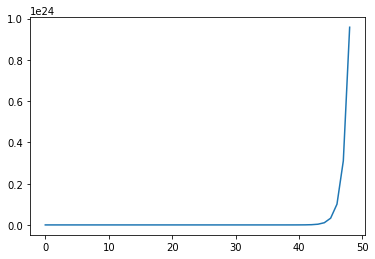

In [6]:
# pratition function
# T=1, B=0, N=i

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = np.trace(matrix_power(T, i))
    z_f = np.append(z_f, z)
    
pylab.plot(z_f) 
pylab.show()

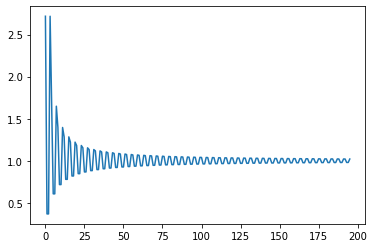

In [7]:
# pratition function
# T=i, B=0, N=2

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = transfer_matrix(i, 0)
    z_f = np.append(z_f, z)
    
    
pylab.plot(z_f) 
pylab.show()

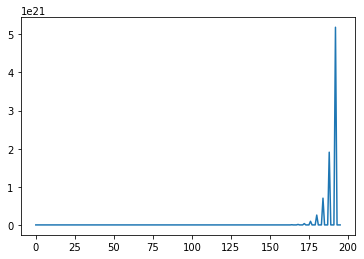

In [8]:
# pratition function
# T=1, B=i, N=2

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = transfer_matrix(1, i)
    z_f = np.append(z_f, z)
       

pylab.plot(z_f) 
pylab.show()

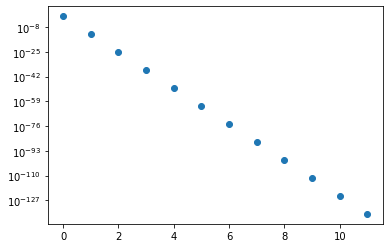

In [38]:
# T=1, B=0, N=?

import warnings; warnings.simplefilter("always")
np.seterr(invalid='ignore')

Z = T@T
Z_Sz = Tz@T@T
Z_SzSz = Tz@T@Tz@T

N = 25 #25
T = transfer_matrix(1, 0)
Tz = impurity_matrix()

SzSz = np.zeros(N+1)

for j in range(0, N):
    z = np.eye(2)
    Z_SzSz = Tz
    for i in range(N):
        Z = Z @ T
        if i == j: 
            Z_SzSz = Z_SzSz @ Tz @ T
        else:
            Z_SzSz = Z_SzSz @ T
    SzSz[j] = np.trace(Z_SzSz)/np.trace(Z)
    
    SzSz[N] = SzSz[-1]

pylab.semilogy(SzSz[0:N//2], 'o') 

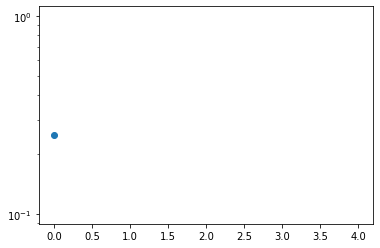

In [37]:
# T=?, B=0, N=10

import warnings; warnings.simplefilter("always")
np.seterr(invalid='ignore')

Z = T@T
Z_Sz = Tz@T@T
Z_SzSz = Tz@T@Tz@T

N = 10
t = -1 * 10**308 #10^308
T = transfer_matrix(t, 0)
Tz = impurity_matrix()

SzSz = np.zeros(N+1)

for j in range(0, N):
    z = np.eye(2)
    Z_SzSz = Tz
    for i in range(N):
        Z = Z @ T
        if i == j: 
            Z_SzSz = Z_SzSz @ Tz @ T
        else:
            Z_SzSz = Z_SzSz @ T
    SzSz[j] = np.trace(Z_SzSz)/np.trace(Z)
    
    SzSz[N] = SzSz[-1]

pylab.semilogy(SzSz[0:N//2], 'o') 